<a href="https://colab.research.google.com/github/Abhishek-2307/Python-For-Finance/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [52]:
# Get the stock quote
df = web.DataReader('GOOGL', data_source='yahoo',start='2012-01-01', end='2019-12-30')
# showing the data
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,334.409424,326.511505,326.796783,333.038025,7345600.0,333.038025
2012-01-04,335.460449,330.640656,332.847839,334.474487,5722200.0,334.474487
2012-01-05,332.317322,328.443451,331.396393,329.834839,6559200.0,329.834839
2012-01-06,330.330322,325.220215,329.904907,325.335327,5380400.0,325.335327
2012-01-09,323.823822,310.925934,323.573578,311.541534,11633500.0,311.541534


In [50]:
# Gettting the number of rows and columns in the data set
df.shape

(2011, 6)

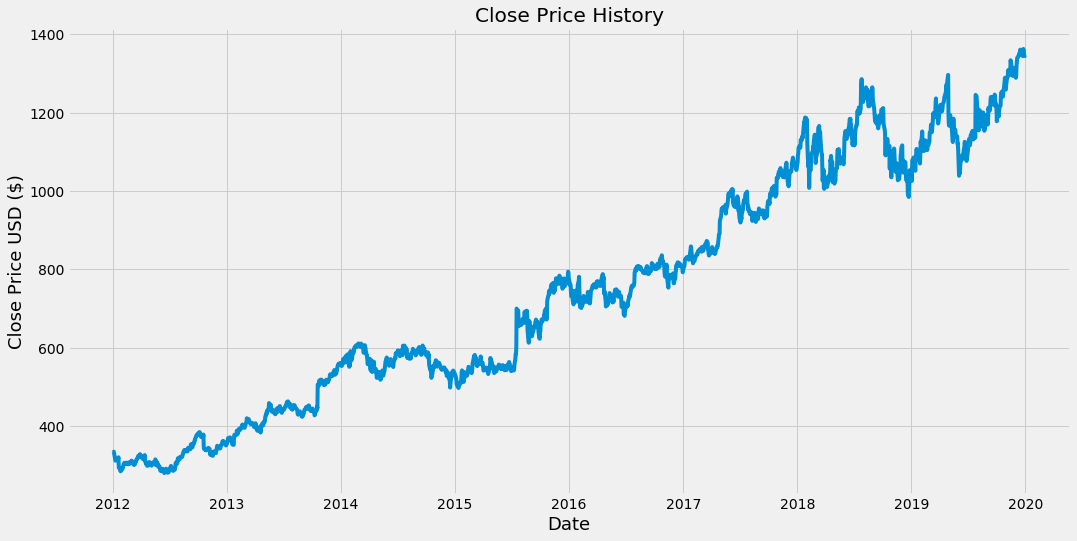

In [27]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [28]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1609

In [29]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04916868],
       [0.05049546],
       [0.04621007],
       ...,
       [1.        ],
       [0.99276789],
       [0.97897779]])

In [30]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.04916868, 0.05049546, 0.04621007, 0.04205411, 0.02931352,
       0.02962789, 0.03093153, 0.03263273, 0.0304831 , 0.03214272,
       0.0341444 , 0.03722323, 0.01245398, 0.01223668, 0.01011482,
       0.00482626, 0.00418367, 0.00967563, 0.00861699, 0.00973572,
       0.01006859, 0.01204715, 0.01723401, 0.02313277, 0.02206027,
       0.0234841 , 0.02422839, 0.02166271, 0.02457047, 0.02344249,
       0.02150089, 0.0219447 , 0.02107559, 0.02540259, 0.02260113,
       0.02175516, 0.02350721, 0.02323447, 0.02743203, 0.02736732,
       0.02928578, 0.02875417, 0.02551816, 0.02122352, 0.02207413,
       0.02223131, 0.01904615, 0.02131135, 0.02715002, 0.02632255,
       0.02869869, 0.03050621, 0.03463906, 0.03441254, 0.03741276,
       0.04021885, 0.03861933, 0.04173514, 0.04066726, 0.04470765])]
[0.04130984634114965]

[array([0.04916868, 0.05049546, 0.04621007, 0.04205411, 0.02931352,
       0.02962789, 0.03093153, 0.03263273, 0.0304831 , 0.03214272,
       0.0341444 , 0.03722323, 0.01

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1549, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1549/1549 [==============================] - 121s 78ms/step - loss: 0.0011


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [40]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

47.0748048679944

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


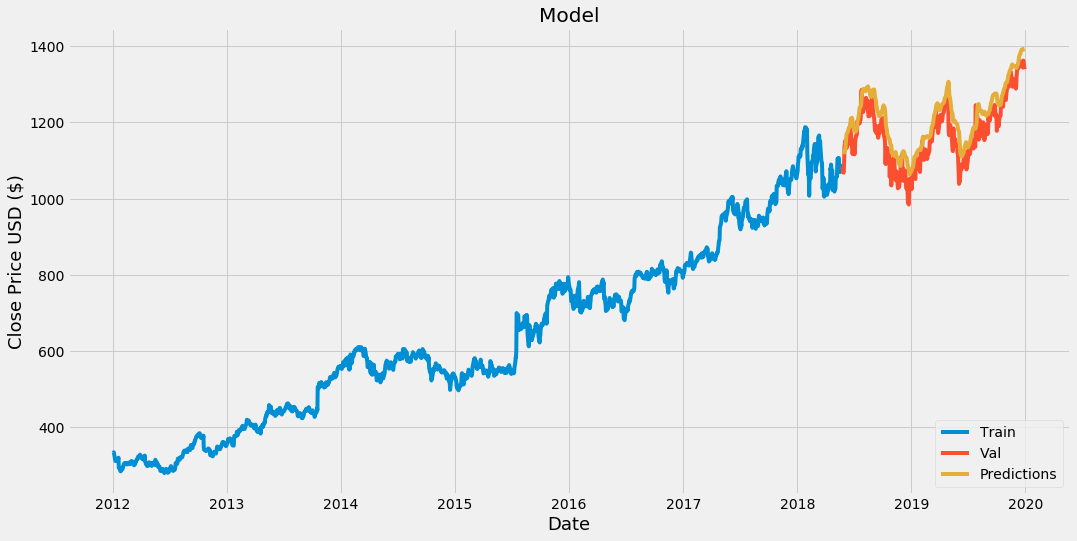

In [41]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [42]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-25,1084.079956,1123.916260
2018-05-29,1068.069946,1124.138916
2018-05-30,1077.469971,1122.302490
2018-05-31,1100.000000,1121.073608
2018-06-01,1135.000000,1123.119629
...,...,...
2019-12-23,1350.630005,1391.856812
2019-12-24,1344.430054,1392.060181
2019-12-26,1362.469971,1391.123169


In [47]:
#Get the quote
apple_quote = web.DataReader('GOOGL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1386.9362]]


In [48]:
#Get the quote
apple_quote2 = web.DataReader('GOOGL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    1351.910034
Name: Close, dtype: float64
